# DAGGER - A toolkit to create and run computation graphs

In [1]:
from formulas import RealEstateFormulas
from computation_graph import GraphFactory, GraphRunner, visualize_graph

# GraphFactory

In [7]:
# Create a graph from formulas in the class RealEstateFormulas
cg = ComputationGraph(RealEstateFormulas)
cg.create_graph()
cg.get_required_inputs()

['purchase_price',
 'closing_costs_multiplier',
 'down_payment',
 'renovations_at_purchase']

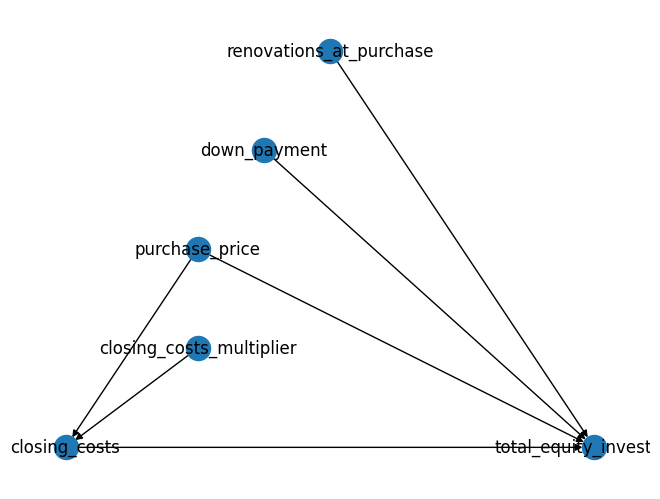

In [8]:
visualize_graph(gf.G)

# GraphRunner

In [11]:
from computation_graph import GraphRunner

inputs = dict(
    purchase_price = 300000,
    closing_costs_multiplier = 0.02,
    # tax_rate = 0.0186,
    down_payment = 65000,
    renovations_at_purchase = 15000,
)

model = GraphRunner(gf, inputs)

In [12]:
model.run()

In [9]:
# To get calculated results, run this without arguments or pass a list of result names to get just those
model.query_results()

{'closing_costs': 6000.0,
 'total_equity_investment': 20865000000.0,
 'purchase_price': 300000,
 'closing_costs_multiplier': 0.02,
 'down_payment': 65000,
 'renovations_at_purchase': 15000}

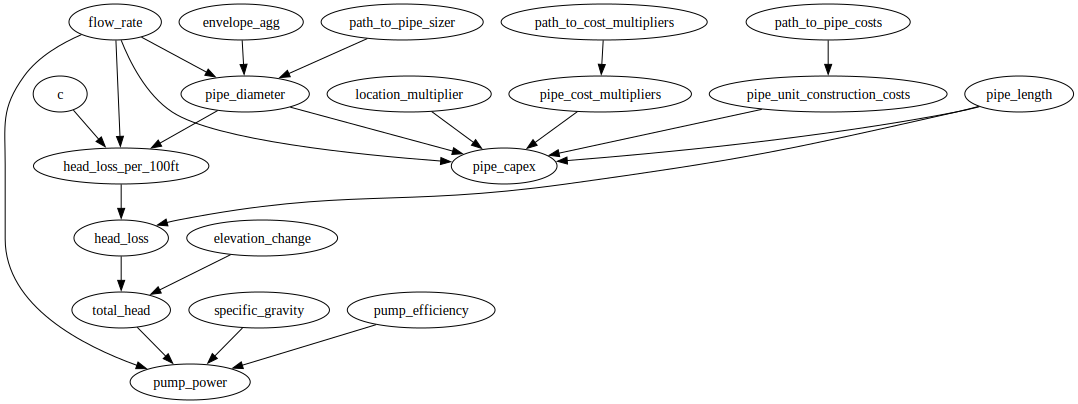

In [ ]:
!pip install pydot
import networkx as nx
from networkx.drawing.nx_pydot import to_pydot  # needs pydot + Graphviz installed

# G = nx.DiGraph()
# G.add_edge("purchase_price", "down_payment")

role_styles = {
    "input": {"shape": "circle", "style": "filled", "fillcolor": "#ffffff"},
    "calculation": {"shape": "square", "style": "filled", "fillcolor": "#cfe8ff"},
    "output": {"shape": "hexagon", "style": "filled", "fillcolor": "#54a24b"},
}

for node in cg.G.nodes:
    attrs = role_styles.get(cg.G.nodes[node].get("role"))
    if not attrs:
        continue
    p_node = pydot_graph.get_node(node)[0]
    for key, value in attrs.items():
        getattr(p_node, f"set_{key}")(value)

pydot_graph = to_pydot(cg.G)

from IPython.display import SVG, display

svg_bytes = pydot_graph.create_svg()
display(SVG(svg_bytes))


In [11]:
cg.query_results()

{'head_loss': None,
 'head_loss_per_100ft': None,
 'pipe_capex': None,
 'pipe_cost_multipliers': None,
 'pipe_diameter': None,
 'pipe_unit_construction_costs': None,
 'pump_power': None,
 'total_head': None,
 'pipe_length': None,
 'flow_rate': None,
 'c': None,
 'location_multiplier': None,
 'path_to_cost_multipliers': None,
 'path_to_pipe_sizer': None,
 'envelope_agg': None,
 'path_to_pipe_costs': None,
 'specific_gravity': None,
 'pump_efficiency': None,
 'elevation_change': None}

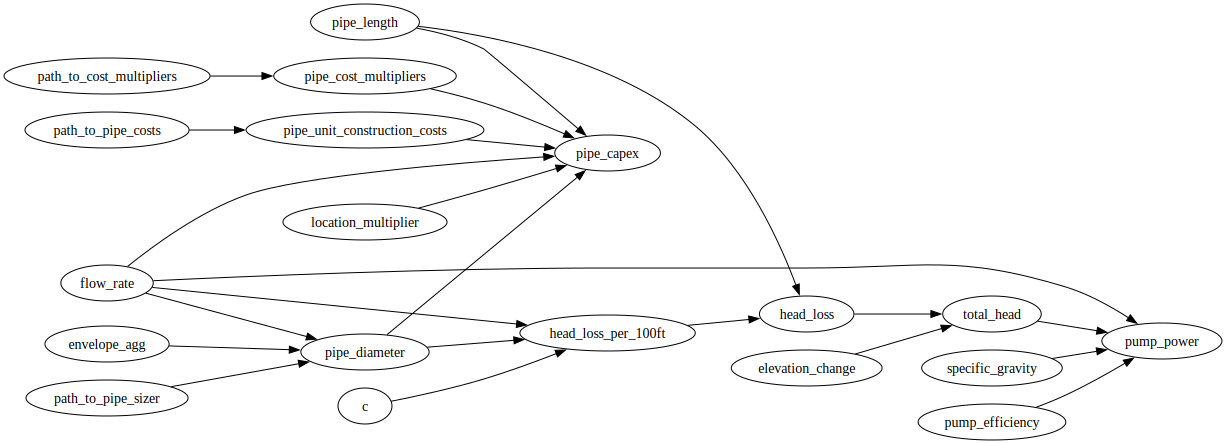

In [10]:
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import SVG, display

role_styles = {
    "input": {"shape": "circle", "style": "filled", "fillcolor": "#ffffff"},
    "calculation": {"shape": "square", "style": "filled", "fillcolor": "#cfe8ff"},
    "output": {"shape": "hexagon", "style": "filled", "fillcolor": "#54a24b"},
}

dot_graph = to_pydot(cg.G)

for node in dot_graph.get_nodes():
    name = node.get_name().strip('"')
    if name in ("graph", "node", "edge"):
        continue  # skip Graphviz defaults
    role = cg.G.nodes[name].get("role")
    style = role_styles.get(role)
    if style:
        node.set_shape(style["shape"])
        node.set_style(style["style"])
        node.set_fillcolor(style["fillcolor"])

dot_graph.set_rankdir("LR")  # keep the left-to-right flow
display(SVG(dot_graph.create_svg()))



In [7]:
from IPython.display import Image, display
display(Image(filename="test.ps"))

ValueError: Cannot embed the 'ps' image format